# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

rec_city = 1
set_city = 1
error = 0

city_name = []
countries = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date_list = []

print("Beginning Data Retrieval")
for city in cities:
    query_url = f"{url}appid={api_key}&units={units}&q="
    print(f"Processing Record {rec_city} of Set {set_city} | {city}")
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        countries.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date_list.append(response['dt'])
        rec_city += 1
    except:
        print("Sorry, city not found")
        error = error + 1
    if rec_city == 51:
        set_city += 1
        rec_city = 1
        time.sleep(20)

Beginning Data Retrieval
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | effium
Processing Record 5 of Set 1 | vaitupu
Sorry, city not found
Processing Record 5 of Set 1 | keetmanshoop
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | honningsvag
Processing Record 8 of Set 1 | vestbygda
Sorry, city not found
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | zyryanovsk
Processing Record 14 of Set 1 | ahipara
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | mogochin
Sorry, city not found
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | wajima
Processing Record 19 of Set 1 | kodiak
P

Processing Record 20 of Set 4 | rungata
Sorry, city not found
Processing Record 20 of Set 4 | yellowknife
Processing Record 21 of Set 4 | qui nhon
Processing Record 22 of Set 4 | vostok
Processing Record 23 of Set 4 | luderitz
Processing Record 24 of Set 4 | kurtalan
Processing Record 25 of Set 4 | touros
Processing Record 26 of Set 4 | husavik
Processing Record 27 of Set 4 | olinda
Processing Record 28 of Set 4 | tishchenskoye
Processing Record 29 of Set 4 | aswan
Processing Record 30 of Set 4 | kavieng
Processing Record 31 of Set 4 | susanino
Processing Record 32 of Set 4 | port elizabeth
Processing Record 33 of Set 4 | kloulklubed
Processing Record 34 of Set 4 | altay
Processing Record 35 of Set 4 | cape elizabeth
Sorry, city not found
Processing Record 35 of Set 4 | fort nelson
Processing Record 36 of Set 4 | inta
Processing Record 37 of Set 4 | formoso do araguaia
Sorry, city not found
Processing Record 37 of Set 4 | okhotsk
Processing Record 38 of Set 4 | ponta do sol
Processing 

Processing Record 50 of Set 7 | aklavik
Processing Record 1 of Set 8 | wejherowo
Processing Record 2 of Set 8 | louisbourg
Sorry, city not found
Processing Record 2 of Set 8 | perth
Processing Record 3 of Set 8 | taseyevo
Processing Record 4 of Set 8 | dillon
Processing Record 5 of Set 8 | nauta
Processing Record 6 of Set 8 | kununurra
Processing Record 7 of Set 8 | zeya
Processing Record 8 of Set 8 | bardiyah
Processing Record 9 of Set 8 | port hardy
Processing Record 10 of Set 8 | zhanatas
Sorry, city not found
Processing Record 10 of Set 8 | emerald
Processing Record 11 of Set 8 | coquimbo
Processing Record 12 of Set 8 | korla
Processing Record 13 of Set 8 | constitucion
Processing Record 14 of Set 8 | opuwo
Processing Record 15 of Set 8 | launceston
Processing Record 16 of Set 8 | marawi
Processing Record 17 of Set 8 | wanxian
Processing Record 18 of Set 8 | simeykyne
Processing Record 19 of Set 8 | matata
Processing Record 20 of Set 8 | hunza
Sorry, city not found
Processing Recor

Processing Record 19 of Set 11 | espanola
Processing Record 20 of Set 11 | bilibino
Processing Record 21 of Set 11 | jalu
Processing Record 22 of Set 11 | unye
Sorry, city not found
Processing Record 22 of Set 11 | hollins
Processing Record 23 of Set 11 | khryashchevka
Processing Record 24 of Set 11 | whitehorse
Processing Record 25 of Set 11 | ayan
Processing Record 26 of Set 11 | samarai
Processing Record 27 of Set 11 | menomonie
Processing Record 28 of Set 11 | strezhevoy
Processing Record 29 of Set 11 | igrim
Processing Record 30 of Set 11 | keti bandar
Processing Record 31 of Set 11 | muroto
Processing Record 32 of Set 11 | horsham
Processing Record 33 of Set 11 | kearney
Processing Record 34 of Set 11 | rovaniemi
Processing Record 35 of Set 11 | hamilton
Processing Record 36 of Set 11 | derzhavinsk
Processing Record 37 of Set 11 | xingyi
Processing Record 38 of Set 11 | lobito
Processing Record 39 of Set 11 | asau
Processing Record 40 of Set 11 | kilindoni
Processing Record 41 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "Cities": city_name,
    "Countries": countries,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed,
    "date": date_list
}
weather_df = pd.DataFrame(weather_dict)
weather_df

,Cities,Countries,lat,lon,temp,humidity,cloudiness,wind speed,date
0,Mataura,NZ,-46.1927,168.8643,21.93,36,100,3.25,1645159626
1,Bengkulu,ID,-3.8004,102.2655,28.87,64,99,1.43,1645159627
2,Puerto Ayora,EC,-0.7393,-90.3518,23.87,89,99,2.95,1645159627
3,Effium,NG,6.6292,8.0593,25.17,80,40,1.22,1645159628
4,Keetmanshoop,NA,-26.5833,18.1333,22.97,63,27,3.12,1645159629
...,...,...,...,...,...,...,...,...,...
559,Ola,RU,59.5833,151.2833,-15.80,76,79,5.25,1645160178
560,Rio de Janeiro,BR,-22.9028,-43.2075,23.00,94,75,1.54,1645160108
561,Wakkanai,JP,45.4094,141.6739,-4.01,74,75,9.26,1645160179
562,Zăvoi,RO,45.5167,22.4167,2.80,89,80,1.87,1645160179


In [7]:
weather_df.to_csv("Output_Data/weather_output.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

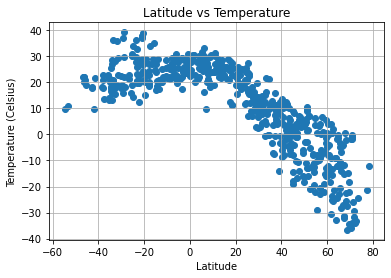

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

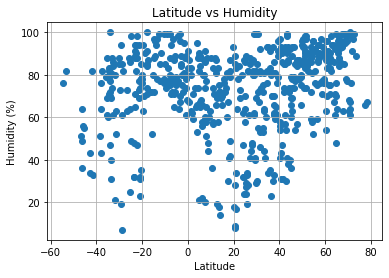

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

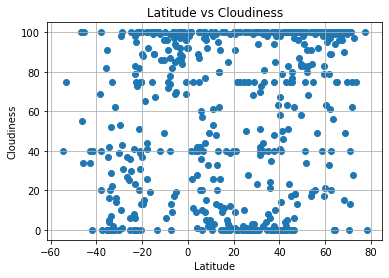

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

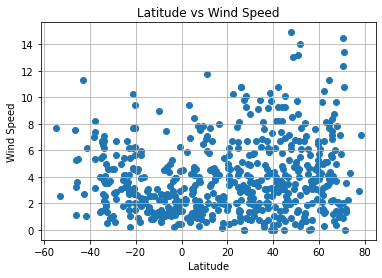

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [17]:
nh_df = weather_df.loc[(weather_df['lat'] >= 0)]
sh_df = weather_df.loc[(weather_df['lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7728857167974981


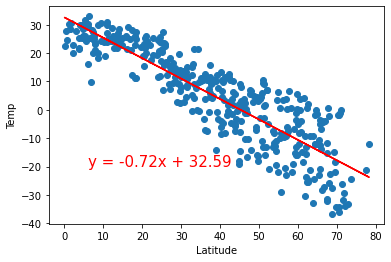

In [29]:
x_values = nh_df['lat']
y_values = nh_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.11281840612720467


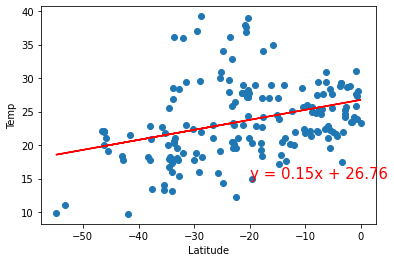

In [26]:
x_values = sh_df['lat']
y_values = sh_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13269358361244282


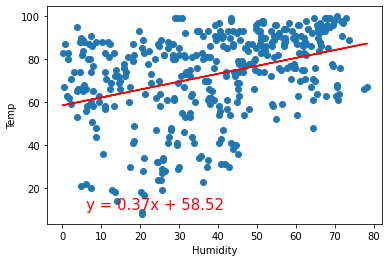

In [20]:
x_values = nh_df['lat']
y_values = nh_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1346774821676317


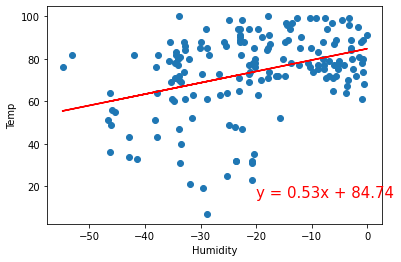

In [27]:
x_values = sh_df['lat']
y_values = sh_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08960364292287874


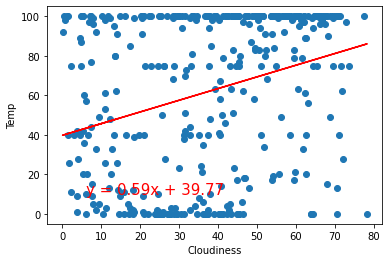

In [25]:
x_values = nh_df['lat']
y_values = nh_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19862602916818187


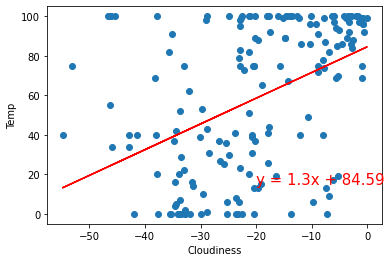

In [28]:
x_values = sh_df['lat']
y_values = sh_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0014402991874598824


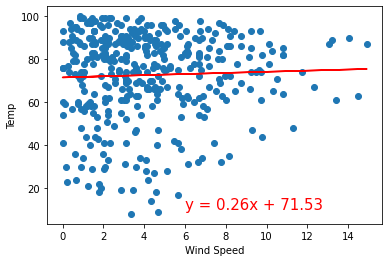

In [23]:
x_values = nh_df['wind speed']
y_values = nh_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1321014195354662


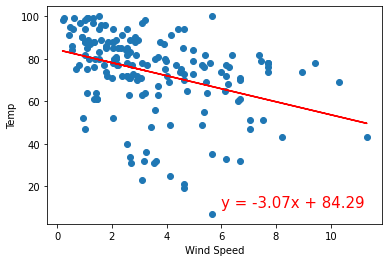

In [22]:
x_values = sh_df['wind speed']
y_values = sh_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()